In [21]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
# Load data
df = pd.read_csv('Online Payment Fraud Detection.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
# check last 5 rows
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [4]:
# check for size of the data
df.shape

(1048575, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [6]:
# check for missing values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [7]:
# check for columns
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [8]:
# check for summary statistic 
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [9]:
df.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

# Data Visualization

Text(0.5, 1.0, 'Transcation type')

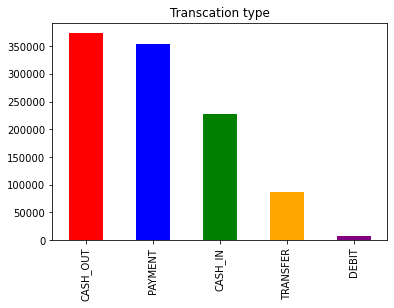

In [10]:
# visualize Transaction type as indicated in type column
df.type.value_counts().plot(kind = 'bar',color=['red','blue', 'green', 'orange', 'purple'])
plt.title("Transcation type")

Cash out and payment are the most common type of transactions

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step', ylabel='Density'>

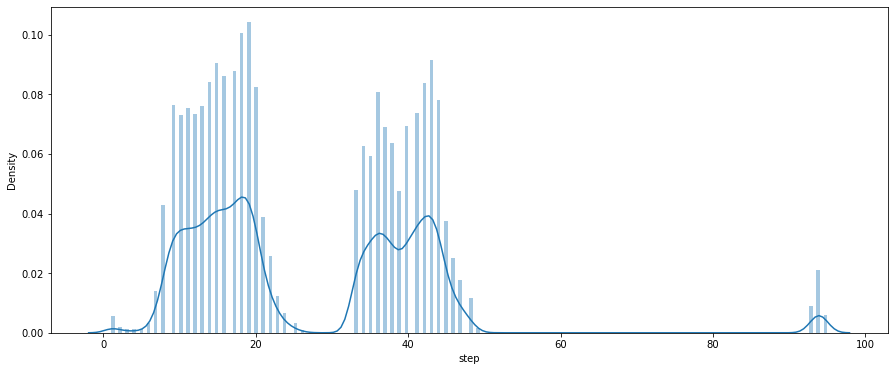

In [11]:
plt.figure(figsize=(15,6))
sns.distplot(df['step'],bins=200)

The above graph indicates the distribution of the step column.

<AxesSubplot:xlabel='type', ylabel='amount'>

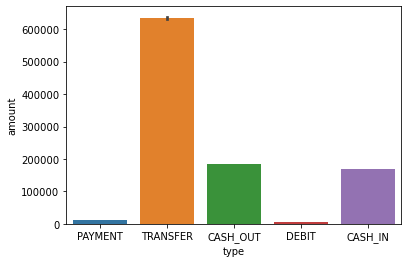

In [12]:
sns.barplot(x='type',y='amount',data=df)

Although 'cash out' and 'payment' are the most common type of transactions, 'transfer' type has the maximum amount of money being transfered to the recipient.

<AxesSubplot:xlabel='isFraud', ylabel='count'>

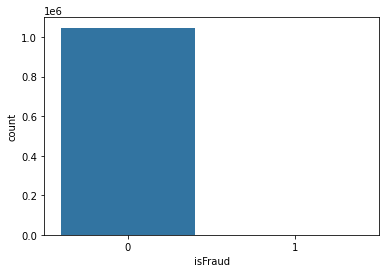

In [13]:
sns.countplot(x='isFraud',data=df)

The above graph indicates that the dataset is highly unbalanced.

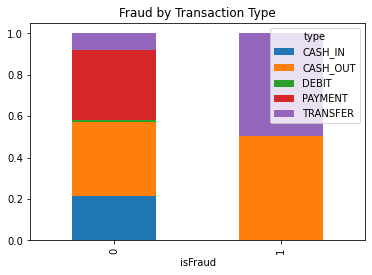

In [14]:
# Check fraud by transcation type 
#create pivot of type and isFraud
type_isFraud_pivot = pd.crosstab(df.isFraud,df.type,normalize='index')
#plot the data
type_isFraud_pivot.plot.bar(stacked=True)
plt.title('Fraud by Transaction Type')
plt.show()

From the above plot, fraud occurs more during Cash out and transfer.

Text(0, 0.5, 'isFraud')

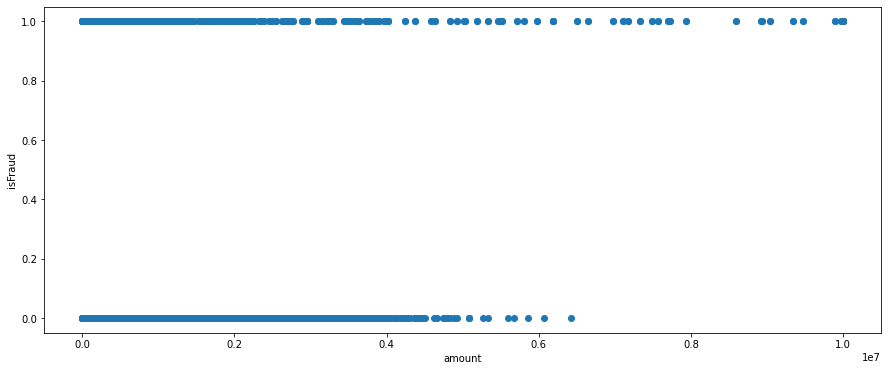

In [15]:
plt.figure(figsize=(15,6))
plt.scatter(x='amount',y='isFraud',data=df)
plt.xlabel('amount')
plt.ylabel('isFraud')

Although the amount of fraudulent transactions is very low, majority of them are constituted within 0 and 1e7 (10,000,000) amount.

<Figure size 5040x3600 with 0 Axes>

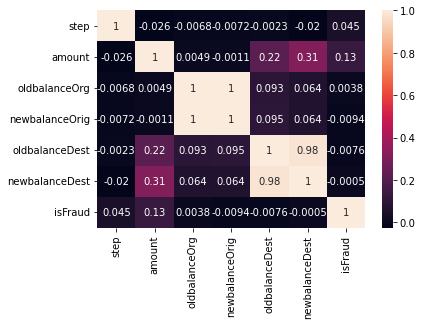

<Figure size 5040x3600 with 0 Axes>

In [18]:
#Visualize correlation using a heatmap
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(70,50))

# Feature Engineering

In [19]:
#Delete unneccesary columns
df.drop(["nameOrig", "nameDest"], axis=1, inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [20]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [22]:
# select categorical variables
cat = ['type']
cat

['type']

In [26]:
# One hot encoding using pd.get_dummies()
cat_dummies = pd.get_dummies(df[cat])
cat_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [28]:
#join the encoded variables back to the main dataframe using pd.concat()
df1 = pd.concat([df, cat_dummies], axis=1)
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [30]:
# remove the initial categorical column now that it has been encoded 
dframe = df1.drop(cat,axis=1)
dframe

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,0,1,0,0,0
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,0,1,0
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,0,1,0
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,0,1,0


In [31]:
dframe.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

# Modelling

In [32]:
# Select target
y = dframe.isFraud

In [33]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [34]:
# features selection
features = dframe.drop(["isFraud"],axis=1)
features.shape

(1048575, 11)

In [36]:
X = dframe[features.columns]
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [37]:
# import libraries for modelling
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [38]:
#split into training and validation sets using a 40% split ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

##  logistic regression

In [39]:
#initialize logistic regression
LR = LogisticRegression(random_state=20)

In [40]:
#fit model on the training data
LR.fit(X_train,y_train)

LogisticRegression(random_state=20)

In [41]:
#predict outcome
LR_preds = LR.predict(X_test)

In [42]:
print(accuracy_score(LR_preds,y_test))

0.9990034093889326


### Logistic regression score = 0.9990034093889326

In [43]:
print(classification_report(LR_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419113
           1       0.39      0.55      0.45       317

    accuracy                           1.00    419430
   macro avg       0.69      0.77      0.73    419430
weighted avg       1.00      1.00      1.00    419430



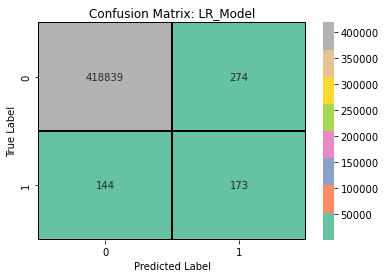

In [49]:
CM = confusion_matrix(LR_preds, y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(CM,
cmap='Set2',
linecolor='black',
linewidths=1.5,
annot=True,
fmt='d')
plt.title('Confusion Matrix: LR_Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

###  KNeighborsClassifier

In [50]:
# Initialize k neighbors
KN = KNeighborsClassifier()

In [51]:
#fit our model on the training data, i.e. we train our Model
KN.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
#predict outcome
KN_preds = KN.predict(X_test)

In [53]:
print(accuracy_score(KN_preds,y_test))

0.9993181222134802


### Accuracy score for KNeighborsClassifier = 0.9993181222134802

In [54]:
print(classification_report(KN_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419121
           1       0.53      0.76      0.62       309

    accuracy                           1.00    419430
   macro avg       0.76      0.88      0.81    419430
weighted avg       1.00      1.00      1.00    419430



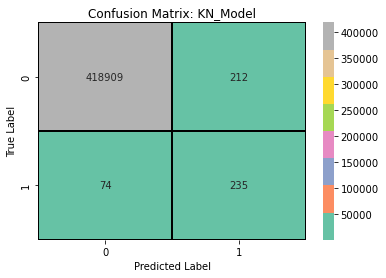

In [55]:
CM = confusion_matrix(KN_preds, y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(CM,
cmap='Set2',
linecolor='black',
linewidths=1.5,
annot=True,
fmt='d')
plt.title('Confusion Matrix: KN_Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### DecisionTreeClassifier

In [57]:
#initialize decision tree
DC = DecisionTreeClassifier(random_state = 20)

In [58]:
#fit model on the training data
DC.fit(X_train, y_train)

DecisionTreeClassifier(random_state=20)

In [59]:
#predict outcome
DC_preds = DC.predict(X_test)

In [60]:
print(accuracy_score(DC_preds,y_test))

0.9996066089693155


### Accuracy score for DecisionTreeClassifier = 0.9996066089693155

In [61]:
print(classification_report(DC_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    418974
           1       0.83      0.81      0.82       456

    accuracy                           1.00    419430
   macro avg       0.91      0.90      0.91    419430
weighted avg       1.00      1.00      1.00    419430



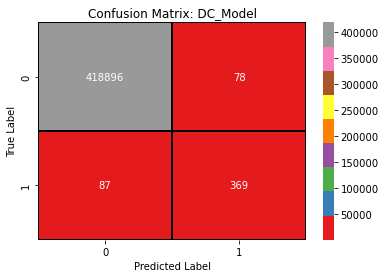

In [63]:
CM = confusion_matrix(DC_preds, y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(CM,
cmap='Set1',
linecolor='black',
linewidths=1.5,
annot=True,
fmt='d')
plt.title('Confusion Matrix: DC_Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

###  RandomForestClassifier

In [64]:
# Initialize RandomForestClassifier
RF =  RandomForestClassifier(random_state=30)

In [65]:
#fit model on the training data
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [66]:
#predict outcome
RF_preds = RF.predict(X_test)

In [67]:
print(accuracy_score(RF_preds,y_test))

0.9997878072622368


### Accuracy score for RandomForestClassifier = 0.9997878072622368

In [68]:
print(classification_report(RF_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419060
           1       0.81      0.98      0.89       370

    accuracy                           1.00    419430
   macro avg       0.91      0.99      0.95    419430
weighted avg       1.00      1.00      1.00    419430



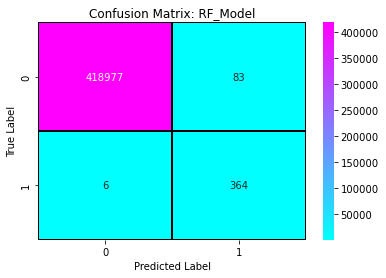

In [69]:
CM = confusion_matrix(RF_preds, y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(CM,
cmap='cool',
linecolor='black',
linewidths=1.5,
annot=True,
fmt='d')
plt.title('Confusion Matrix: RF_Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Train and Test Split

In [70]:
#create list of your model names
models = [LR,KN,DC,RF]

In [71]:
models

[LogisticRegression(random_state=20),
 KNeighborsClassifier(),
 DecisionTreeClassifier(random_state=20),
 RandomForestClassifier(random_state=30)]

In [73]:
#create function to train a model and evaluate accuracy
def trainer(models,X_train,y_train,X_valid,y_valid):
    #fit your model
    models.fit(X_train,y_train)
    #predict on the fitted model
    prediction = models.predict(X_valid)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(models.__class__.__name__,accuracy_score(prediction,y_valid)))
   

In [74]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)


For LogisticRegression, Accuracy score is 0.9990034093889326 


For KNeighborsClassifier, Accuracy score is 0.9993181222134802 


For DecisionTreeClassifier, Accuracy score is 0.9996066089693155 


For RandomForestClassifier, Accuracy score is 0.9997878072622368 



In [75]:
#create function to train a model and evaluate accuracy
def trainer(models,X_train,y_train,X_valid,y_valid):
    #fit your model
    models.fit(X_train,y_train)
    #predict on the fitted model
    prediction = models.predict(X_valid)
    #print evaluation metric
    print('\nFor {}, classification_report is {} \n'.format(models.__class__.__name__,classification_report(prediction,y_valid)))
    

In [76]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)


For LogisticRegression, classification_report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00    419113
           1       0.39      0.55      0.45       317

    accuracy                           1.00    419430
   macro avg       0.69      0.77      0.73    419430
weighted avg       1.00      1.00      1.00    419430
 


For KNeighborsClassifier, classification_report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00    419121
           1       0.53      0.76      0.62       309

    accuracy                           1.00    419430
   macro avg       0.76      0.88      0.81    419430
weighted avg       1.00      1.00      1.00    419430
 


For DecisionTreeClassifier, classification_report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00    418974
           1       0.83      0.81      0.82       456

    accuracy          

RandomForest classsifier shows the highest prediction accuracy of 81% and recall accuracy of 98%, which is important were false negative is the priority. 